In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Lien pour récupérer les données : https://www.kaggle.com/lukebm/forest-fires-in-brazil-adjusted

In [5]:
data = pd.read_csv('amazon.csv', encoding = "latin1", thousands = '.')
data.head()

,id,year,state,month,number
0,0,1998,Acre,Janeiro,0
1,1,1999,Acre,Janeiro,0
2,2,2000,Acre,Janeiro,0
3,3,2001,Acre,Janeiro,0
4,4,2002,Acre,Janeiro,0


# Nettoyage des données

In [6]:
month_trad = {"Janeiro":"Janvier","Fevereiro":"Février","Marco":"Mars","Abril":"Avril","Maio":"Mai","Junho":"Juin",
              "Julho":"Juillet","Agosto":"Aout","Setembro":"Septembre","Outubro":"Octobre","Novembro":"Novembre",
              "Dezembro":"Decembre"}
data['month']=data['month'].map(month_trad)

data.head()

,id,year,state,month,number
0,0,1998,Acre,Janvier,0
1,1,1999,Acre,Janvier,0
2,2,2000,Acre,Janvier,0
3,3,2001,Acre,Janvier,0
4,4,2002,Acre,Janvier,0


# Analyse

### Jeu de données

In [7]:
print(color.BOLD + "Nombre de lignes : " + color.END + str(data.count()['year']))
print(color.BOLD + 'Etats présents dans le fichier : ' + color.END)
states = pd.unique(data['state'])
print(states)
print(color.BOLD + "Année allant de : " + color.END + str(data['year'].min())+" à "+str(data['year'].max()))

Nombre de lignes : 6454
Etats présents dans le fichier : 
['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Mato Grosso do Sul'
 'Minas Gerais' 'Para' 'Paraiba' 'Parana' 'Pernambuco' 'Piaui'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rio Grande do Sul' 'Rondonia'
 'Roraima' 'Santa Catarina' 'Sao Paulo' 'Sergipe' 'Tocantins']
Année allant de : 1998 à 2017


### Evolution du nombre de feux à travers les années

In [8]:
nb_fires_per_year = data.groupby(['year']).sum().reset_index()

Text(0.5, 1.0, 'Nombre de feux par an au Brésil')

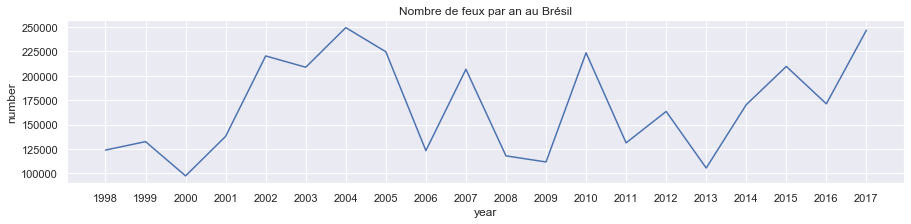

In [9]:
sns.set()
plt.figure(figsize=(15,3))
locator = matplotlib.ticker.MultipleLocator()
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
ax = sns.lineplot(x="year", y="number", data=nb_fires_per_year)
ax.set_title("Nombre de feux par an au Brésil")

### Evolution du nombre de feux par état entre 1998 et 2017

In [14]:
percentage_evolution_nb_fire = pd.DataFrame(columns =['state','nb_mean_3_first_years','nb_mean_3_last_years','diff', 'diff_percentage'])
nb_fires_per_year_and_state = data.groupby(['state','year']).sum()
for state in states:
    init_val = int((nb_fires_per_year_and_state.loc[state,1998]['number']+nb_fires_per_year_and_state.loc[state,1999]['number']+nb_fires_per_year_and_state.loc[state,2000]['number'])/3)
    final_val = int((nb_fires_per_year_and_state.loc[state,2015]['number']+nb_fires_per_year_and_state.loc[state,2016]['number']+nb_fires_per_year_and_state.loc[state,2017]['number'])/3)
    percentage_evolution_nb_fire = percentage_evolution_nb_fire.append({'state':state,
                                                                        'nb_mean_3_first_years':init_val,
                                                                        'nb_mean_3_last_years':final_val,
                                                                        'diff':final_val-init_val,
                                                                        'diff_percentage':((final_val-init_val)/init_val)*100},
                                                                      ignore_index=True)

percentage_evolution_nb_fire


,state,nb_mean_3_first_years,nb_mean_3_last_years,diff,diff_percentage
0,Acre,499,6515,6016,1205.611222
1,Alagoas,127,383,256,201.574803
2,Amapa,210,1828,1618,770.476190
3,Amazonas,953,13997,13044,1368.730325
4,Bahia,4559,11132,6573,144.176354
5,Ceara,2174,3073,899,41.352346
6,Distrito Federal,65,274,209,321.538462
7,Espirito Santo,211,639,428,202.843602
8,Goias,5224,6947,1723,32.982389
9,Maranhao,10643,25542,14899,139.988725


Text(0.5, 1.0, 'Nombre de feux par an et par Etat au Brésil')

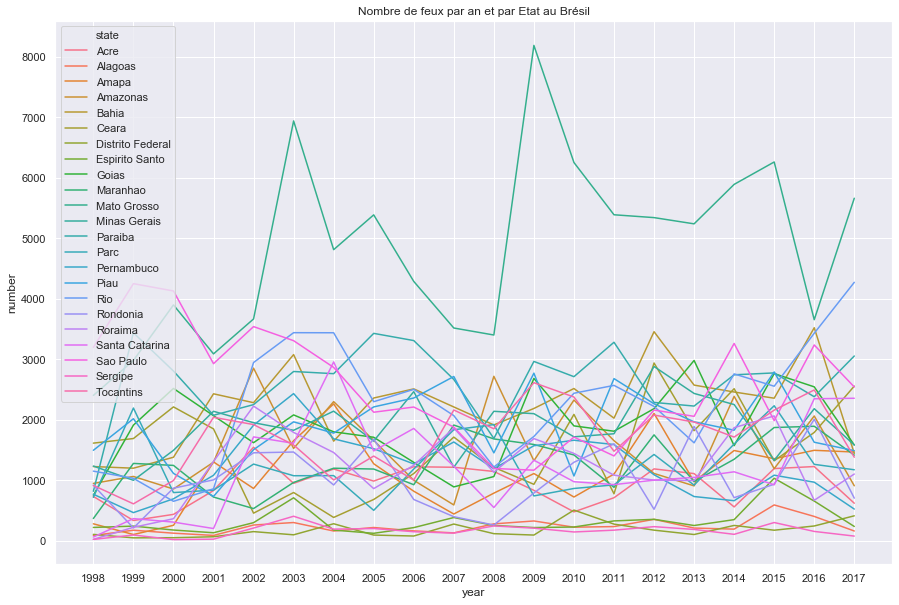

In [132]:
sns.set()
plt.figure(figsize=(15,10))
locator = matplotlib.ticker.MultipleLocator()
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
ax = sns.lineplot(x="year", y="number", hue="state", data=nb_fires_per_year_and_state)
ax.set_title("Nombre de feux par an et par Etat au Brésil")